In [1]:
import numpy as np 
import pandas as pd
from DecisionTreeModels import decision_tree_model, predict, average_error
from pprint import pprint
from tqdm import tqdm

In [2]:
## Reading the car data files and setting the X_train/X_test and y_train/y_test
df_train = pd.read_csv('car/train.csv')
df_train.columns = ['buying', 'maint', 'doors',
                        'persons', 'lug_boot', 'safety', 'label']
X_train = df_train[['buying', 'maint',
                        'doors', 'persons', 'lug_boot', 'safety']]
y_train = df_train['label']

df_test = pd.read_csv('car/test.csv')
df_test.columns = ['buying', 'maint', 'doors',
                       'persons', 'lug_boot', 'safety', 'label']
X_test = df_test[['buying', 'maint', 'doors',
                      'persons', 'lug_boot', 'safety']]
y_test = df_test['label']

## Q2a 


## decision_tree_model: Notes the user can pass the parameters X_train,y_train, model_name, and max_depth. model_name can be selectes as 'IG' for information gain, 'ME' for majority error and 'GI' for Gini Index

In [3]:
model_name = 'IG'
max_depth = 6

# train the model 
m = decision_tree_model(X_train,y_train,model_name=model_name, max_depth=max_depth)
#pprint(m)

# predict the values
y_train_pred = predict(X_train,m)
y_test_pred = predict(X_test,m)

#calculate the average error
train_error = average_error(y_train,y_train_pred)
test_error = average_error(y_test,y_test_pred)
print('Q2a depth : ',max_depth, 'model : ',model_name,'train_error : ',train_error,'test_error : ',test_error)


Q2a depth :  6 model :  IG train_error :  0.0 test_error :  0.08803301237964237


## Q2b
Train Error/Test Error for Information Gain, Majority Error and GiniIndex is mentioned below with no of depth

In [4]:
# define empty list to store the calculated error
train_error_InfoGain = []
test_error_InfoGain = []
train_error_ME = []
test_error_ME=[]
train_error_GI = []
test_error_GI = []
depth = []


for i in tqdm(range(1,7,1)):
    max_depth = i
    depth.append(i)
    model_name = 'IG'
    m = decision_tree_model(X_train,y_train,model_name=model_name, max_depth=max_depth)
    y_train_pred = predict(X_train,m)
    y_test_pred = predict(X_test,m)
    train_error = average_error(y_train,y_train_pred)
    test_error = average_error(y_test,y_test_pred)
    train_error_InfoGain.append(train_error)
    test_error_InfoGain.append(test_error)
    #print('depth : ',max_depth, 'model : ',model_name,'train_error : ',train_error,'test_error : ',test_error)

    model_name = 'ME'
    m = decision_tree_model(X_train,y_train,model_name=model_name, max_depth=max_depth)
    y_train_pred = predict(X_train,m)
    y_test_pred = predict(X_test,m)
    train_error = average_error(y_train,y_train_pred)
    test_error = average_error(y_test,y_test_pred)
    train_error_ME.append(train_error)
    test_error_ME.append(test_error)
    #print('depth : ',max_depth, 'model : ',model_name,'train_error : ',train_error,'test_error : ',test_error)

    model_name = 'GI'
    m = decision_tree_model(X_train,y_train,model_name=model_name, max_depth=max_depth)
    y_train_pred = predict(X_train,m)
    y_test_pred = predict(X_test,m)
    train_error = average_error(y_train,y_train_pred)
    test_error = average_error(y_test,y_test_pred)
    train_error_GI.append(train_error)
    test_error_GI.append(test_error)
#     print('depth : ',max_depth, 'model : ',model_name,'train_error : ',train_error,'test_error : ',test_error)
    
#     print('#############################')
df_error = pd.DataFrame({
                         'depth':depth,
                         'tr_err_IG':train_error_InfoGain,
                         'te_err_IG':test_error_InfoGain,
                         'tr_err_ME':train_error_ME,
                         'te_err_ME':test_error_ME,
                         'tr_err_GI':train_error_GI,
                         'te_err_GI':test_error_GI,
                        })
print('Q2b')
print(df_error)

100%|█████████████████████████████████████████████| 6/6 [00:13<00:00,  2.18s/it]

Q2b
   depth  tr_err_IG  te_err_IG  tr_err_ME  te_err_ME  tr_err_GI  te_err_GI
0      1   0.301301   0.297111   0.301301   0.297111   0.301301   0.297111
1      2   0.222222   0.222834   0.292292   0.313618   0.222222   0.222834
2      3   0.181181   0.196699   0.180180   0.192572   0.176176   0.184319
3      4   0.082082   0.147180   0.086086   0.147180   0.089089   0.133425
4      5   0.027027   0.088033   0.029029   0.097662   0.027027   0.088033
5      6   0.000000   0.088033   0.000000   0.097662   0.000000   0.088033


Text(0.5, 0, 'Tree Depth')

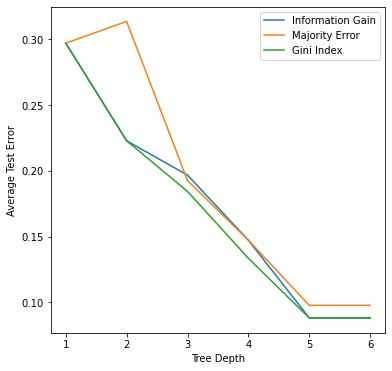

In [5]:
df_error_car = df_error
import matplotlib.pyplot as plt
# plot the dataframe
df_error_car.plot(x="depth", y=['te_err_IG','te_err_ME','te_err_GI'], kind="line",figsize=(6, 6))
plt.legend(['Information Gain','Majority Error','Gini Index'])
plt.ylabel('Average Test Error')
plt.xlabel('Tree Depth')

Text(0.5, 0, 'Tree Depth')

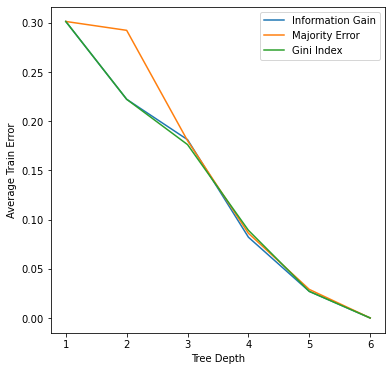

In [6]:
df_error_car = df_error
import matplotlib.pyplot as plt
# plot the dataframe
df_error_car.plot(x="depth", y=['tr_err_IG','tr_err_ME','tr_err_GI'], kind="line",figsize=(6, 6))
plt.legend(['Information Gain','Majority Error','Gini Index'])
plt.ylabel('Average Train Error')
plt.xlabel('Tree Depth')

## Q3a
Let us consider “unknown” as a particular attribute value, and hence
we do not have any missing attributes for both training and test. Vary the
maximum tree depth from 1 to 16 — for each setting, run your algorithm to learn
a decision tree, and use the tree to predict both the training and test examples.
Again, if your tree cannot grow up to 16 levels, stop at the maximum level. Report
in a table the average prediction errors on each dataset when you use information
gain, majority error and gini index heuristics, respectively

In [7]:
# preprocessed the input data to convert the integer attributes to categorical using median as threshold

def preprocessed_train_input(X):
    '''
    preprocessed the training input data to convert the 
    integer attributes to categorical using median as threshold
    return the modified train data and the median value to be used for test data
    '''
    X_num = X.select_dtypes(include=[np.int64])
    X_object = X.select_dtypes(include='object')
    binary = pd.DataFrame()
    median = {}
    for c in X_num.columns:
        med = np.median(X_num[c])
        # update the median dictinary with median value
        median[c]=med
        # if > median value True otherwise False
        binary[c]=X_num[c]>med
    X_new = pd.concat([X_object,binary],axis=1)
    return(X_new,median)


def preprocessed_test_input(X,train_median):
    '''
    processed the numerical test data with median value of the train data
    '''
    X_num = X.select_dtypes(include=[np.int64])
    X_object = X.select_dtypes(include='object')
    binary = pd.DataFrame()
    for c in X_num.columns:
        #print(c)
        #print(train_median[c])
        # if > median value True otherwise False
        binary[c]=X_num[c]>train_median[c]
    X_new = pd.concat([X_object,binary],axis=1)
    return(X_new)

df_train = pd.read_csv('bank/train.csv',header=None)
column_name = ['age','job','marital','education','default','balance','housing','loan','contact','day','month','duration','campaign','pdays','previous','poutcome','y']
df_train.columns=column_name

#print(df_train.dtypes)
# define X_train original 
X_train_b = df_train[['age','job','marital','education','default','balance','housing','loan','contact','day','month','duration','campaign','pdays','previous','poutcome']]

# X_train after preprocessing
X_train=preprocessed_train_input(X_train_b)[0] # 0th index 
y_train = df_train['y']
train_median= preprocessed_train_input(X_train_b)[1] # 1st index return median value 

df_test = pd.read_csv('bank/test.csv',header=None)
column_name = ['age','job','marital','education','default','balance','housing','loan','contact','day','month','duration','campaign','pdays','previous','poutcome','y']
df_test.columns=column_name
X_test_b= df_test[['age','job','marital','education','default','balance','housing','loan','contact','day','month','duration','campaign','pdays','previous','poutcome']]

# X_test after preprocessing
X_test=preprocessed_test_input(X_test_b,train_median)
y_test = df_test['y']

#print(X_train.head(4))

In [8]:
# define empty list to store the calculated error
train_error_InfoGain = []
test_error_InfoGain = []
train_error_ME = []
test_error_ME=[]
train_error_GI = []
test_error_GI = []
depth = []


for i in tqdm(range(1,17,1)):
    max_depth = i
    depth.append(i)
    model_name = 'IG'
    m = decision_tree_model(X_train,y_train,model_name=model_name, max_depth=max_depth)
    y_train_pred = predict(X_train,m)
    y_test_pred = predict(X_test,m)
    train_error = average_error(y_train,y_train_pred)
    test_error = average_error(y_test,y_test_pred)
    train_error_InfoGain.append(train_error)
    test_error_InfoGain.append(test_error)
    #print('depth : ',max_depth, 'model : ',model_name,'train_error : ',train_error,'test_error : ',test_error)

    model_name = 'ME'
    m = decision_tree_model(X_train,y_train,model_name=model_name, max_depth=max_depth)
    y_train_pred = predict(X_train,m)
    y_test_pred = predict(X_test,m)
    train_error = average_error(y_train,y_train_pred)
    test_error = average_error(y_test,y_test_pred)
    train_error_ME.append(train_error)
    test_error_ME.append(test_error)
    #print('depth : ',max_depth, 'model : ',model_name,'train_error : ',train_error,'test_error : ',test_error)

    model_name = 'GI'
    m = decision_tree_model(X_train,y_train,model_name=model_name, max_depth=max_depth)
    y_train_pred = predict(X_train,m)
    y_test_pred = predict(X_test,m)
    train_error = average_error(y_train,y_train_pred)
    test_error = average_error(y_test,y_test_pred)
    train_error_GI.append(train_error)
    test_error_GI.append(test_error)
#     print('depth : ',max_depth, 'model : ',model_name,'train_error : ',train_error,'test_error : ',test_error)
    
#     print('#############################')
df_error = pd.DataFrame({
                         'depth':depth,
                         'tr_err_IG':train_error_InfoGain,
                         'te_err_IG':test_error_InfoGain,
                         'tr_err_ME':train_error_ME,
                         'te_err_ME':test_error_ME,
                         'tr_err_GI':train_error_GI,
                         'te_err_GI':test_error_GI,
                        })
print('Q3a')
print(df_error)

    

100%|███████████████████████████████████████████| 16/16 [13:50<00:00, 51.93s/it]

Q3a
    depth  tr_err_IG  te_err_IG  tr_err_ME  te_err_ME  tr_err_GI  te_err_GI
0       1     0.1192     0.1248     0.1088     0.1166     0.1088     0.1166
1       2     0.1060     0.1114     0.1042     0.1088     0.1042     0.1088
2       3     0.1006     0.1068     0.0940     0.1150     0.0936     0.1124
3       4     0.0800     0.1138     0.0764     0.1224     0.0752     0.1206
4       5     0.0624     0.1238     0.0610     0.1296     0.0604     0.1292
5       6     0.0480     0.1316     0.0518     0.1358     0.0482     0.1390
6       7     0.0372     0.1380     0.0438     0.1438     0.0364     0.1482
7       8     0.0292     0.1422     0.0384     0.1466     0.0268     0.1522
8       9     0.0222     0.1466     0.0318     0.1520     0.0216     0.1562
9      10     0.0180     0.1514     0.0268     0.1580     0.0174     0.1588
10     11     0.0156     0.1524     0.0242     0.1622     0.0144     0.1620
11     12     0.0140     0.1550     0.0192     0.1660     0.0140     0.1624
12     1

Text(0.5, 0, 'Tree Depth')

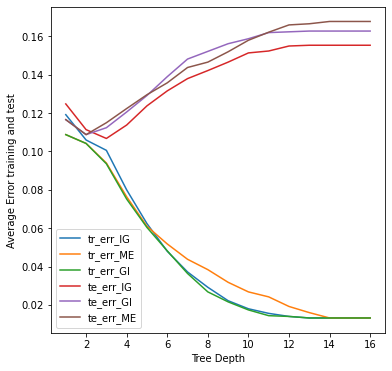

In [9]:
df_error_media = df_error
import matplotlib.pyplot as plt

# plot the dataframe

df_error_media.plot(x="depth", y=['tr_err_IG','tr_err_ME','tr_err_GI','te_err_IG','te_err_GI','te_err_ME'], kind="line",figsize=(6, 6))

plt.ylabel('Average Error training and test')
plt.xlabel('Tree Depth')

## Q3b 
Let us consider ”unknown” as attribute value missing. Here we
simply complete it with the majority of other values of the same attribute in the
training set. Vary the maximum tree depth from 1 to 16 — for each setting,
run your algorithm to learn a decision tree, and use the tree to predict both the
training and test examples. Report in a table the average prediction errors on each
dataset when you use information gain, majority error and gini index heuristics,
respectively

In [10]:
## replace the unknown value with maximum value

# first replace the unknown with nan value
X_train.replace('unknown', np.NaN, inplace=True)
X_test.replace('unknown', np.NaN, inplace=True)

# function to get maximum value for each column in X_train
def get_max(X_train):
    maximum = {}
    for c in X_train.columns:  
        maximum[c] = X_train[c].value_counts().index[0]
    return(maximum)

# function to set nan to maximum value both for train and test 
def set_max(X,maximum):
    for c in X.columns:
        X[c] = X[c].fillna(maximum[c])
    return(X)



In [11]:
# get maximum of train data 
maximum = get_max(X_train)
# set nan to max value of the training data
X_train_m = set_max(X_train,maximum)
X_test_m = set_max(X_test,maximum)


In [12]:
# define empty list for the errors
train_error_InfoGain = []
test_error_InfoGain = []
train_error_ME = []
test_error_ME=[]
train_error_GI = []
test_error_GI = []
depth = []


for i in tqdm(range(1,17,1)):
    max_depth = i
    depth.append(i)
    model_name = 'IG'
    m = decision_tree_model(X_train_m,y_train,model_name=model_name, max_depth=max_depth)
    y_train_pred = predict(X_train_m,m)
    y_test_pred = predict(X_test_m,m)
    train_error = average_error(y_train,y_train_pred)
    test_error = average_error(y_test,y_test_pred)
    train_error_InfoGain.append(train_error)
    test_error_InfoGain.append(test_error)
    #print('depth : ',max_depth, 'model : ',model_name,'train_error : ',train_error,'test_error : ',test_error)

    model_name = 'ME'
    m = decision_tree_model(X_train_m,y_train,model_name=model_name, max_depth=max_depth)
    y_train_pred = predict(X_train_m,m)
    y_test_pred = predict(X_test_m,m)
    train_error = average_error(y_train,y_train_pred)
    test_error = average_error(y_test,y_test_pred)
    train_error_ME.append(train_error)
    test_error_ME.append(test_error)
    #print('depth : ',max_depth, 'model : ',model_name,'train_error : ',train_error,'test_error : ',test_error)

    model_name = 'GI'
    m = decision_tree_model(X_train_m,y_train,model_name=model_name, max_depth=max_depth)
    y_train_pred = predict(X_train_m,m)
    y_test_pred = predict(X_test_m,m)
    train_error = average_error(y_train,y_train_pred)
    test_error = average_error(y_test,y_test_pred)
    train_error_GI.append(train_error)
    test_error_GI.append(test_error)
#     print('depth : ',max_depth, 'model : ',model_name,'train_error : ',train_error,'test_error : ',test_error)
    
#     print('#############################')
df_error = pd.DataFrame({
                         'depth':depth,
                         'tr_err_IG':train_error_InfoGain,
                         'te_err_IG':test_error_InfoGain,
                         'tr_err_ME':train_error_ME,
                         'te_err_ME':test_error_ME,
                         'tr_err_GI':train_error_GI,
                         'te_err_GI':test_error_GI,
                        })
print('Q3b')
print(df_error)

100%|███████████████████████████████████████████| 16/16 [12:57<00:00, 48.57s/it]

Q3b
    depth  tr_err_IG  te_err_IG  tr_err_ME  te_err_ME  tr_err_GI  te_err_GI
0       1     0.1192     0.1248     0.1088     0.1166     0.1088     0.1166
1       2     0.1060     0.1114     0.1050     0.1102     0.1052     0.1104
2       3     0.1022     0.1090     0.0976     0.1144     0.1010     0.1082
3       4     0.0876     0.1180     0.0826     0.1202     0.0880     0.1164
4       5     0.0698     0.1264     0.0706     0.1240     0.0720     0.1250
5       6     0.0560     0.1320     0.0586     0.1356     0.0562     0.1300
6       7     0.0442     0.1386     0.0532     0.1376     0.0442     0.1404
7       8     0.0366     0.1412     0.0472     0.1434     0.0354     0.1418
8       9     0.0304     0.1460     0.0414     0.1456     0.0298     0.1468
9      10     0.0242     0.1498     0.0376     0.1496     0.0236     0.1494
10     11     0.0212     0.1522     0.0334     0.1536     0.0204     0.1516
11     12     0.0186     0.1522     0.0278     0.1622     0.0188     0.1520
12     1

Text(0.5, 0, 'Tree Depth')

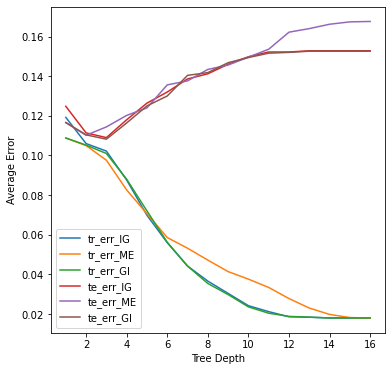

In [13]:
df_error_max = df_error
import matplotlib.pyplot as plt

# plot the dataframe

df_error_max.plot(x="depth", y=['tr_err_IG','tr_err_ME','tr_err_GI','te_err_IG','te_err_ME','te_err_GI'], kind="line",figsize=(6, 6))
plt.ylabel('Average Error')
plt.xlabel('Tree Depth')